# ECE M148 Homework 2

## Damien Ha

### Question 1

K = 1, RMSE = 0.0
K = 2, RMSE = 1.241638702145945
K = 3, RMSE = 1.3333333333333333
K = 6, RMSE = 1.632993161855452


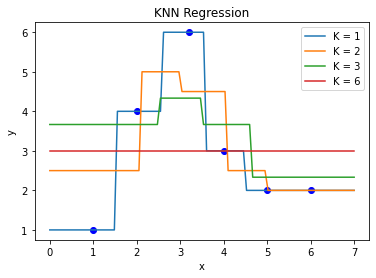

In [1]:
# Code from last time modified to compute mean squared error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math

X = np.array([[1], [2], [3.2], [4], [5], [6]])
y = np.array([[1], [4], [6], [3], [2], [2]])

X_pred = np.linspace(0, 7, 100).reshape(-1, 1)
k_values = [1, 2, 3, 6]

plt.scatter(X, y, color = 'blue')
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X_pred)
    plt.plot(X_pred, y_pred, label='K = {}'.format(k))
    # new code to computer mean squared error
    y_train_pred = knn.predict(X)
    rmse = math.sqrt(mean_squared_error(y, y_train_pred))
    print('K = {}, RMSE = {}'.format(k, rmse))
# this is the same
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('KNN Regression')
plt.show()

I would use K = 2, although K = 1 has the lowest RMSE, at 0 it's almost perfectly predicting the values which may suggest overfitting. K = 2 has the next lowest RMSE that isn't 0

In [2]:
X_test = np.array([[1.25], [3.4], [4.25]])
y_test = np.array([[2], [5], [2.5]])

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    print('K = {}, RMSE = {}'.format(k, rmse))

K = 1, RMSE = 0.8660254037844386
K = 2, RMSE = 0.408248290463863
K = 3, RMSE = 1.2360330811826103
K = 6, RMSE = 1.3228756555322954


I would still use K = 2, it has the lowest RMSE. K = 1 no longer has an RMSE 0 so it's no longer overfitted, but K = 2 has a lower RMSE without being 0

### Question 2

#### a.

Partial derivative of the MSE with respect to $\beta_0$:

$\frac{\partial}{\partial \beta_0} \frac{1}{n} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2 = \frac{-2}{n} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)$

Setting equal to zero:

$\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i) = 0$

$\sum_{i=1}^n y_i - n\beta_0 - \beta_1 \sum_{i=1}^n x_i = 0$

$\sum_{i=1}^n y_i - \beta_1 \sum_{i=1}^n x_i = n\beta_0$

$\frac{1}{n}(\sum_{i=1}^n y_i - \beta_1 \sum_{i=1}^n x_i) = \beta_0$

$\frac{1}{n}\sum_{i=1}^n y_i - \beta_1 \frac{1}{n}\sum_{i=1}^n x_i = \beta_0$

$\beta_0 = \bar{y} - \beta_1\bar{x}$

Partial derivative of the MSE with respect to $\beta_1$:

$\frac{\partial}{\partial \beta_1} \frac{1}{n} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2 = \frac{-2}{n} \sum_{i=1}^n x_i(y_i - \beta_0 - \beta_1 x_i)$

Setting equal to zero:

$\sum_{i=1}^n x_i (y_i - \beta_0 - \beta_1 x_i) = 0$

(given $\beta_0 = \bar{y} - \beta_1\bar{x}$)

$\sum_{i=1}^n x_i (y_i - \bar{y} + \beta_1 \bar{x} - \beta_1 x_i) = 0$

$\sum_{i=1}^n x_i (y_i - \bar{y}) + \beta_1 \bar{x} \sum_{i=1}^n x_i - \beta_1 \sum_{i=1}^n x_i^2 = 0$

$\beta_1 \sum_{i=1}^n x_i^2 - \beta_1 \bar{x} \sum_{i=1}^n x_i = \sum_{i=1}^n x_i (y_i - \bar{y})$

$\beta_1 = \frac{\sum_{i=1}^n x_i (y_i - \bar{y})}{\sum_{i=1}^nx_i^2 - n\bar{x}^2}$

$\beta_1 = \frac{(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}$

#### b.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = np.array([[1], [2], [3], [4]])
y = np.array([[1], [2], [3], [3.5]])

lm = LinearRegression()
lm.fit(X, y)

beta0 = lm.intercept_
beta1 = lm.coef_[0]

print("Beta0:", beta0)
print("Beta1:", beta1)

y_pred = lm.predict(X)
r2 = r2_score(y, y_pred)

print("R-squared:", r2)

Beta0: [0.25]
Beta1: [0.85]
R-squared: 0.9796610169491525


$\beta_1$ represents the slope of the regression line, or rate of change in y with respect to x. In this case, this means with a 1 unit increase in x we expect a 0.85 increase in y

### Question 3

#### a.

One hot encoding is a technique where we use numbers to represent categorical variables so machine learning algorithms can process them. Each categorical feature is represented as a vector with length of the number of categories in that feature. We can use it with algorithms that are unable to directly process categorical data

#### b.

i. Appropriate, this is a categorical feature and has a limited number of possible values

ii. Not appropriate, this is a numerical feature

iii. Appropriate, this is a categorical feature and has a limited number of possible values

iv. Not appropriate, each homeowner owns only one home so this won't be giving useful information for prediction or classification purposes

v. Not appropriate, this is a numerical feature

### Question 4

#### a.

This graph is overfitted, it too closely captures the position of each point and may not be able to generalize and predict other new data.

#### b.

This graph is a good fit as it follows the general trend of the data without overfitting by trying to hit every data point, so it is accurate yet generalized enough to be valuable for prediction

#### c.

This graph is underfitted. It's too generalized to accurately make predictions for more data

### Question 5

#### a.

False. Linear regression can be solved by minimizing MSE, which is a method called ordinary least squares. Trying all possible values is too computationally expensive

#### b.

False. A model is overfitted when training error is significantly smaller than testing error

#### c.

True. $R^2$ is a measure of how well a regression model fits the data and takes values between 0 and 1, where closer 1 indicates the model fits the data perfectly

#### d.

False. In fact it can be thought of as the otherway around. Multi-linear regression is a generalization of simple linear regression with multiple independent variables, and polynomical regression can be thought of as a case of multi-linear regression where the independent variables are polynomial terms

#### e.

False. KNN is more likely to overfit with small K as the model will become more complex and capture noise, whereas with larger K it will be simpler and more general